## Modelos paramétricos y no paramétricos de supervivencia

Materia: Estadistica Aplicada 

Grupo: 042
                                                                                     
Matricula : 1946646

Por Ana Sofia Saucedo Garcia

In [2]:
# Librerias (basicas) 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

# Libreria especializada 

import statsmodels.formula.api as smf 
from lifelines import ExponentialFitter
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import seaborn as sns
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

# Libreria que requiere mi computadora para importar un archivo de internet
import ssl


In [3]:
# Paso extra para importar el archivo de internet 
ssl._create_default_https_context = ssl._create_unverified_context

### Ejercicio 3 

En el enlace se encuentra la base de datos “quiebra.csv”que midelos años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra),  la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada(no se observó la quiebra en el periodo de observación). La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa

In [4]:
# Datos
quiebra =pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [5]:
quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


#### a) Ajuste un modelo de supervivencia exponencial 

In [6]:
# ExponentialFitter().fit(tiempo sup,censura/evento)
expo = ExponentialFitter().fit(quiebra['tiempo'],quiebra['quebrar'])

In [7]:
expo.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

#### b) Grafique la función de riesgo exponencial

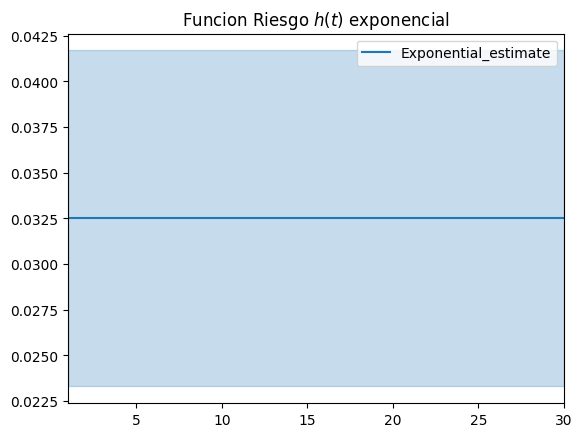

In [8]:
# graficar h(t)
expo.plot_hazard()
plt.title('Funcion Riesgo $h(t)$ exponencial')
plt.xlim(min(quiebra['tiempo']),max(quiebra['tiempo']));


#### c) ¿Cuál es  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?

**Del 3.25% es el riesgo de que una empresa quiebre en el tiempo t segun la funcion exponencial.**

### Ejercicio 4

Con  la  base  de  datos del  ejercicio  3 responda lo siguiente:

#### a)Ajuste un modelo Weibull de supervivencia 

In [9]:
# WeibullFitter().fit(tiempo sup,evento/censura)

weibull = WeibullFitter().fit(quiebra['tiempo'],quiebra['quebrar'])

In [10]:
weibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

#### b) Grafique la función de riesgo

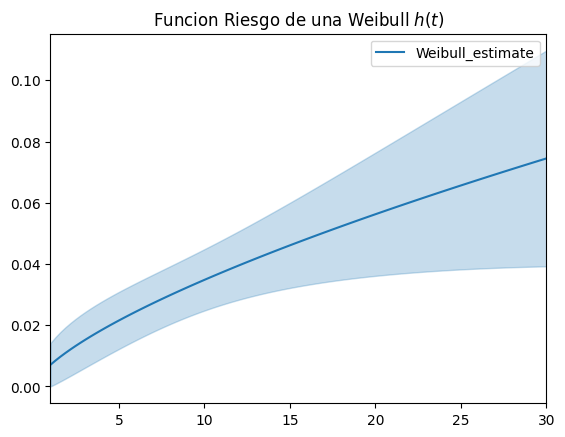

In [11]:
weibull.plot_hazard()
plt.title('Funcion Riesgo de una Weibull $h(t)$')
plt.xlim(min(quiebra['tiempo']),max(quiebra['tiempo']));

#### c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

**La funcion de riesgo tiene forma creciente, es decir el riesgo de quebrar es mayor entre mas años tenga la empresa.**

### Ejercicio 5

Con  la  base  de  datos del  ejercicio  3 responda lo siguiente:

#### a) Ajuste un modelo Log-Normal

In [12]:
logn = LogNormalFitter().fit(quiebra['tiempo'],quiebra['quebrar'])

In [13]:
logn.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

#### b) Grafique la función de riesgo

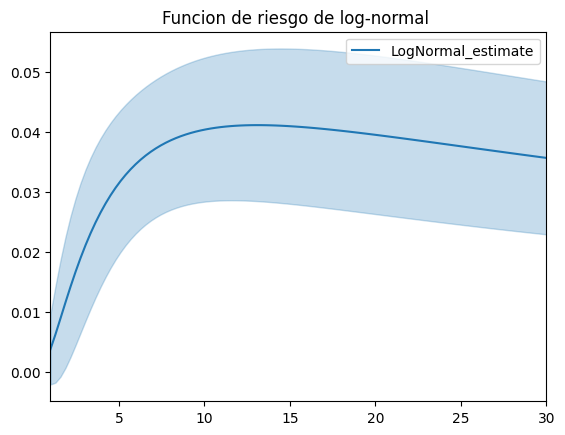

In [14]:
# Función de Riesgo log normal 

logn.plot_hazard()
plt.title('Funcion de riesgo de log-normal ')
plt.xlim(min(quiebra['tiempo']),max(quiebra['tiempo']));

In [15]:
logn.hazard_

,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143
...,...
28.828283,0.036053
29.121212,0.035941
29.414141,0.035829
29.707071,0.035718


#### c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

**En los primeros años el riesgo de quebrar es creciente y hasta llegar a los 10 años tiende un poco a decrecer , es decir que entre mas años tenga la empresa su riesgo de quebrar podria ser menor.**


 ### Ejercicio 6

Utilizando  elestimador  de  Kaplan-Meierrealice  una  notebook  en  Python para responder lo siguiente:

A) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

In [16]:
#Estimador 
km= KaplanMeierFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
#Función de supervivencia
km.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


In [17]:
#Mediana
km.median_survival_time_

23.0

**La mediana del tiempo de supervivencia es de 23 años, significa que la mitad de estas empresas estan por arriba o por abajo de 23 años lo que tardan en quebrar .**

B) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [18]:
##Separamos por hombres y mujeres
hom =quiebra.query('mujer==0')
muj =quiebra.query('mujer==1')

In [19]:
#Funciones 
km_h=KaplanMeierFitter().fit(hom['tiempo'],hom['quebrar'])
km_m=KaplanMeierFitter().fit(muj['tiempo'],muj['quebrar'])

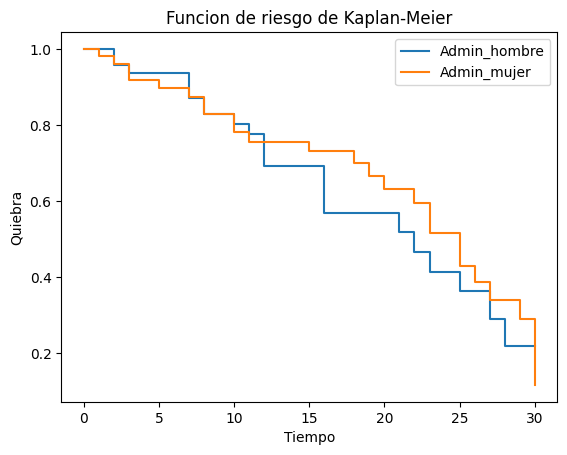

In [23]:
km_h.plot_survival_function(label='Admin_hombre',ci_show=False)
km_m.plot_survival_function(label='Admin_mujer',ci_show=False)
plt.title('Funcion de riesgo de Kaplan-Meier')
plt.xlabel('Tiempo')
plt.ylabel('Quiebra');


Por tanto en el grafico se observa que las empresas administradas por hombres quiebran mas rapido

C) El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

In [21]:
from lifelines.statistics import logrank_test

Prueba de hipotesis ( Long-rank-test)

$ H_0 : S(1)= S(2)$  

$ H_a : S(1)\neq S(2)$ funciones de supervencias distintas

In [24]:
LRT = logrank_test(hom['tiempo'],muj['tiempo'],hom['quebrar'],muj['quebrar'])

In [25]:
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [26]:
LRT.p_value.round(2)

0.59

Como p value no es menor a alpha , entonces no rechazamos $H_0$ , con un nivel de confianza del 95% , significa que las funciones de supervivencia no son distintas , es decir las empresas fundadas ya sea por hombres o por mujeres tienden a quebrar igual.